In [84]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import numpy as np
import itertools

First, we are going to generate complete graph data with random position and weights to test our algorithms onto.

In [85]:
# Function to generate a complete graph with random weights
def generate_point_graph_with_weights(n,weight_range):
      # Create a complete graph with n nodes
      np.random.seed(42)  # Seed for reproducibility
      point_graph = nx.Graph()
      first_iteration = True
      for node in range(n):
            positions = (np.random.uniform(), np.random.uniform())
            if first_iteration:
                  positions = (0.5,0.5) #we want the first node to be in the center
                  first_iteration = False
            point_graph.add_node(node, pos=positions,weight=np.random.randint(1, weight_range))
      for node1 in point_graph.nodes:
            for node2 in point_graph.nodes:
                  if node1 < node2:  # To avoid adding the same edge twice
                        edge_weight = np.random.randint(1, weight_range)
                        point_graph.add_edge(node1, node2, weight=edge_weight)
      return point_graph

In [86]:
# Parameters
n = 10  # Number of nodes
weight_range = 5  # highest value the weight can go

# Generate graphs
point_graph = generate_point_graph_with_weights(n,weight_range)

TypeError: draw_networkx_edge_labels() missing 1 required positional argument: 'pos'

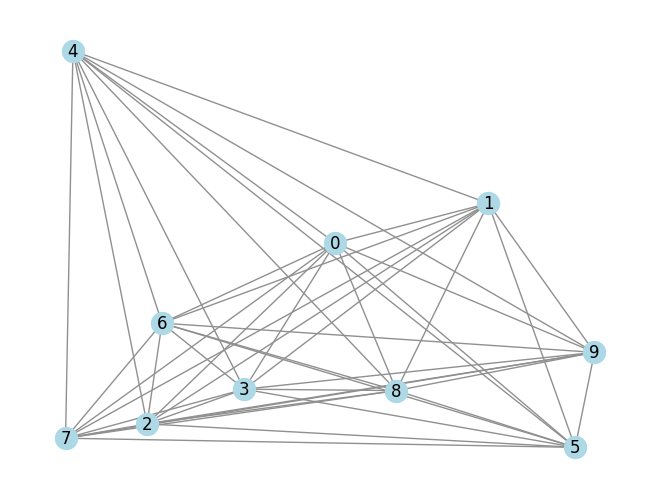

In [93]:
# Drawing the graph
positions = nx.get_node_attributes(point_graph, 'pos')
nx.draw(point_graph, positions, with_labels=True, node_color='lightblue', edge_color='#909090', node_size=250) # drawing nodes
label_pos = {node: (position[0], position[1] + 0.03) for node, position in positions.items()}  # Adjust 0.1 as needed
labels = {node: point_graph.nodes[node]['weight'] for node in point_graph.nodes()}
labels_ed = nx.get_edge_attributes(point_graph, 'weight')
nx.draw_networkx_edge_labels(point_graph, positions, edge_labels=labels_ed, font_size=6)

nx.draw_networkx_labels(point_graph, label_pos, labels=labels, font_size=12, font_color='red')

# Show the graph
plt.title('Complete Graph with Random Weights')
plt.show()

In [88]:
for node, attrs in point_graph.nodes(data=True):
    print(f"Node {node} has a weight of {attrs['weight']} at position {attrs['pos']}")
node_connection_info = []

Node 0 has a weight of 3 at position (0.5, 0.5)
Node 1 has a weight of 2 at position (0.7796910002727693, 0.596850157946487)
Node 2 has a weight of 4 at position (0.15599452033620265, 0.05808361216819946)
Node 3 has a weight of 3 at position (0.33370861113902184, 0.14286681792194078)
Node 4 has a weight of 4 at position (0.020584494295802447, 0.9699098521619943)
Node 5 has a weight of 4 at position (0.9385527090157502, 0.0007787658410143283)
Node 6 has a weight of 2 at position (0.18340450985343382, 0.3042422429595377)
Node 7 has a weight of 3 at position (0.007066305219717406, 0.023062425041415757)
Node 8 has a weight of 4 at position (0.6118528947223795, 0.13949386065204183)
Node 9 has a weight of 2 at position (0.9737555188414592, 0.23277134043030423)


In [89]:
# for each node, we store the position and weights as customers data
customers = {node: {'position': attrs['pos'], 'demand': attrs['weight']} for node, attrs in point_graph.nodes(data=True)}


depot_position = (0.5, 0.5) # we want the center of the graphs to be the depot_position

vehicle_capacity = 10 # TBD

# Function to calculate Euclidean distance
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Select the core stop
# Option 1: Core stop based on maximum demand
#core_stop_demand = max(customers, key=lambda x: customers[x]['demand'])
# Option 2: Core stop based on the furthest distance from the depot
core_stop_distance = max(customers, key=lambda x: distance(customers[x]['position'], depot_position))

# Choose the core stop selection mechanism
core_stop = core_stop_distance # or core_stop_demand

# Start clustering
cluster = [core_stop]
current_load = customers[core_stop]['demand']

# Function to calculate the geometric center of the cluster
def calculate_centroid(cluster):
    positions = [customers[c]['position'] for c in cluster]
    centroid = np.mean(positions, axis=0)
    return centroid

# Initial centroid
centroid = calculate_centroid(cluster)

# Cluster generation
unclustered = set(customers) - set(cluster)
while unclustered and current_load < vehicle_capacity:
    # Find the nearest customer to the centroid that doesn't exceed capacity
    nearest = min(unclustered, key=lambda x: (distance(customers[x]['position'], centroid), -customers[x]['demand']))
    if current_load + customers[nearest]['demand'] <= vehicle_capacity:
        cluster.append(nearest)
        current_load += customers[nearest]['demand']
        centroid = calculate_centroid(cluster)
        unclustered.remove(nearest)
    else:
        break

# Output results
print("Cluster:", cluster)
print("Cluster load:", current_load)
print("Cluster centroid:", centroid)

Cluster: [7, 2, 3]
Cluster load: 10
Cluster centroid: [0.16558981 0.07467095]
